In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
plt.style.use('ggplot')

import nltk

In [12]:
# Read the dataset
filePath = './fake reviews dataset udated.csv'
df = pd.read_csv(filePath)
df.head()

,reviewer_name,category,rating,label,text_
0,Uthkarsh Vora,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Chirag Dubey,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Advik Barad,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Ira Chada,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Tara Boase,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


In [13]:
df.dtypes

reviewer_name    object
category         object
rating            int64
label            object
text_            object
dtype: object

In [14]:
reviews = df['text_'].tolist()
#print(reviews)
sentiment_score = []
sentiment_subjectivity=[]
review_head_sentiment=[]
for rev in reviews:
    testimonial = TextBlob(rev)
    sentiment_score.append(testimonial.sentiment.polarity)
    sentiment_subjectivity.append(testimonial.sentiment.subjectivity)

In [15]:
# df['Sentiment'] = sentiment_score
df['Subjectivity'] = sentiment_subjectivity
df.head()

,reviewer_name,category,rating,label,text_,Subjectivity
0,Uthkarsh Vora,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor...",0.8
1,Chirag Dubey,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I...",0.7
2,Advik Barad,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...,0.3
3,Ira Chada,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i...",0.4
4,Tara Boase,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...,0.8


In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()

res={}

# Claculating polarity score of each row in dataframe
for i,row in tqdm(df.iterrows(), total=len(df)):
    text=row["text_"]
    res[text]=sia.polarity_scores(text)

vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'text_'})

vaders= vaders.merge(df, how='left')

vaders.head(20)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
vaders.to_csv('review_sentiments_dataset.csv', index=False)

<Axes: xlabel='rating', ylabel='compound'>

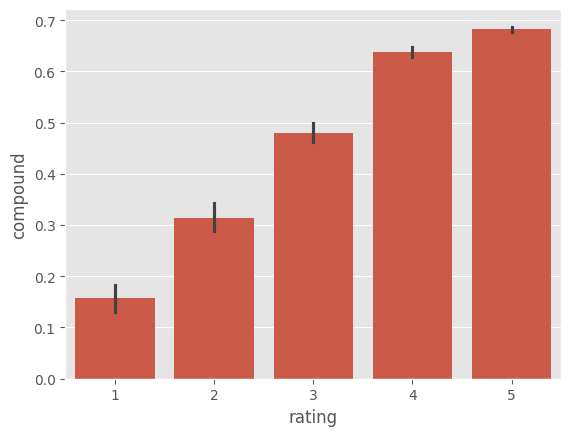

In [ ]:
sns.barplot(data=vaders, x='rating', y='compound')

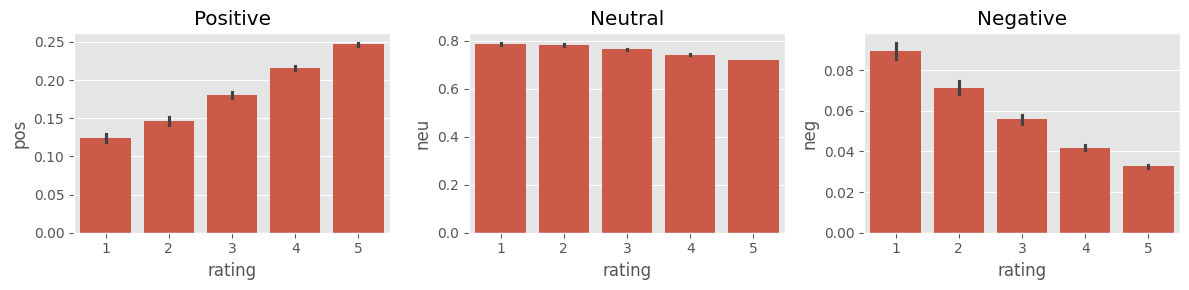

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()